In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [3]:
#load to new dataset result merge of yellow and green taxi
df = pd.read_csv('combined_dataset.csv')

In [4]:
df.shape

(320766, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320766 entries, 0 to 320765
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               320766 non-null  float64
 1   tpep_pickup_datetime   320766 non-null  object 
 2   tpep_dropoff_datetime  320766 non-null  object 
 3   passenger_count        320766 non-null  float64
 4   trip_distance          320766 non-null  float64
 5   RatecodeID             320766 non-null  float64
 6   store_and_fwd_flag     320766 non-null  object 
 7   PULocationID           320766 non-null  int64  
 8   DOLocationID           320766 non-null  int64  
 9   payment_type           320766 non-null  float64
 10  fare_amount            320766 non-null  float64
 11  extra                  320766 non-null  float64
 12  mta_tax                320766 non-null  float64
 13  tip_amount             320766 non-null  float64
 14  tolls_amount           320766 non-nu

In [6]:
df['RatecodeID'].unique()

array([ 1.,  2.,  5., 99.,  3.,  4.,  6.])

In [7]:
# Update the values in the VendorID, RatecodeID, store_and_fwd_flag
# to make them more user friendly
df['VendorID'] = df.VendorID.astype('category')
df.VendorID.cat.rename_categories(['Creative Mobile Technologies,LLC','VeriFone Inc'], inplace = True);

df['payment_type'] = df.payment_type.astype('category')
df.payment_type.cat.rename_categories(['Credit card','Cash','No charge','Dispute','Unknown'], inplace = True);

In [8]:
df['RatecodeID'] = df.RatecodeID.astype('category')
df.RatecodeID.cat.rename_categories(['Standard rate','JFK','Negotiated fare','other','Newark', 'Nassau or Westchester','Group ride'], inplace = True);

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,taxi_kind
0,"Creative Mobile Technologies,LLC",2020-05-01 00:02:28,2020-05-01 00:18:07,1.0,0.0,Standard rate,N,234,256,Credit card,12.2,3.0,0.5,2.4,0.0,0.3,18.4,2.5,yellow
1,"Creative Mobile Technologies,LLC",2020-05-01 00:23:21,2020-05-01 00:26:01,2.0,0.4,Standard rate,N,264,264,Credit card,4.0,0.5,0.5,0.5,0.0,0.3,5.8,0.0,yellow
2,"Creative Mobile Technologies,LLC",2020-05-01 00:54:58,2020-05-01 00:57:11,1.0,0.3,Standard rate,N,264,264,Cash,3.5,0.5,0.5,0.0,0.0,0.3,4.8,0.0,yellow
3,"Creative Mobile Technologies,LLC",2020-05-01 00:07:10,2020-05-01 00:12:46,1.0,1.7,Standard rate,N,107,229,Cash,7.0,3.0,0.5,0.0,0.0,0.3,10.8,2.5,yellow
4,"Creative Mobile Technologies,LLC",2020-05-01 00:55:47,2020-05-01 01:01:54,0.0,0.9,Standard rate,N,237,262,Credit card,6.0,3.0,0.5,1.2,0.0,0.3,11.0,2.5,yellow


<a id='eda'></a>
## Exploratory Data Analysis

### Questions

In [10]:
df.describe()

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,320766.000000,320766.000000,320766.000000,320766.000000,320766.000000,320766.000000,320766.000000,320766.000000,320766.000000,320766.000000,320766.000000,289480.000000
mean,1.301182,2.786745,151.493915,148.918816,12.753952,1.066976,0.490176,1.511511,0.174117,0.296328,17.391924,2.037726
std,0.967358,19.713131,71.874923,75.173812,758.422491,1.260619,0.085975,2.624925,1.270229,0.044733,758.557148,0.993512
min,0.000000,0.000000,1.000000,1.000000,-240.000000,-4.500000,-0.500000,-11.060000,-13.750000,-0.300000,-244.300000,-2.500000
25%,1.000000,0.940000,82.000000,75.000000,5.500000,0.000000,0.500000,0.000000,0.000000,0.300000,9.800000,2.500000
50%,1.000000,1.700000,142.000000,143.000000,8.000000,0.500000,0.500000,1.000000,0.000000,0.300000,12.800000,2.500000
75%,1.000000,3.130000,233.000000,232.000000,13.000000,2.500000,0.500000,2.400000,0.000000,0.300000,18.000000,2.500000
max,9.000000,10973.550000,265.000000,265.000000,429496.720000,65.530000,3.550000,442.180000,200.000000,0.300000,429562.250000,2.500000


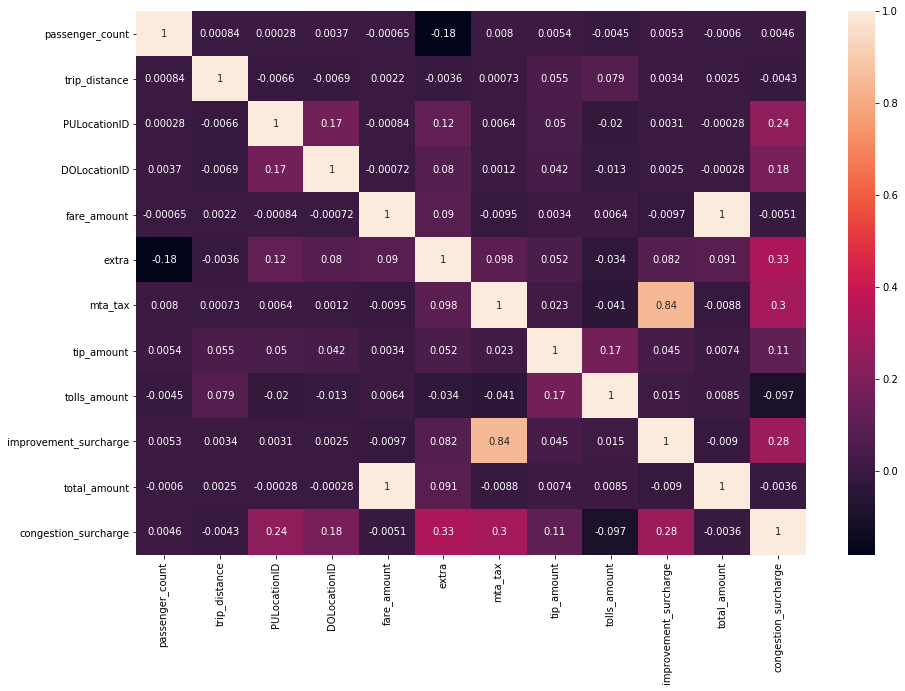

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True);

In [12]:
# Create a funtion to calculate the plot the group proportions based on one variable by number of appointments

def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)
    

In [13]:
# Create a funtion to generate a bar plot the frequency table 
# generated by the Show_NoShow_by_Group function.

def green_yellow_bar_plot(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.taxi_kind, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 0, fontsize = 9);
    ax.set_title('yellow_taxi vs. green_taxi (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 9)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 9)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 9)
    return df_by_Group

VeriFone Inc                        58.97
Creative Mobile Technologies,LLC    41.03
Name: VendorID, dtype: float64

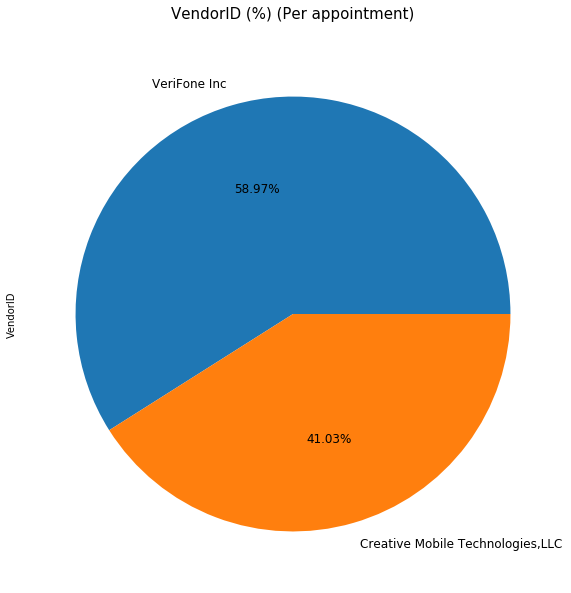

In [14]:
PropByVar(df,'VendorID')

taxi_kind,green,yellow
RatecodeID,,
Standard rate,9.49,90.51
JFK,2.11,97.89
Negotiated fare,5.06,94.94
other,5.93,94.07
Newark,43.14,56.86
Nassau or Westchester,0.00,100.00
Group ride,0.00,100.00


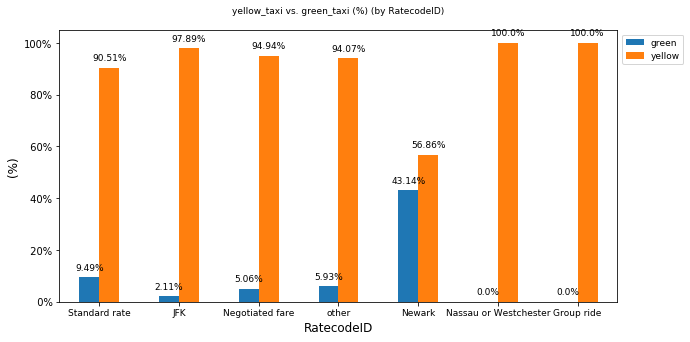

In [15]:
green_yellow_bar_plot(df, 'RatecodeID')


taxi_kind,green,yellow
payment_type,,
Credit card,8.21,91.79
Cash,12.30,87.70
No charge,6.71,93.29
Dispute,2.81,97.19
Unknown,100.00,0.00


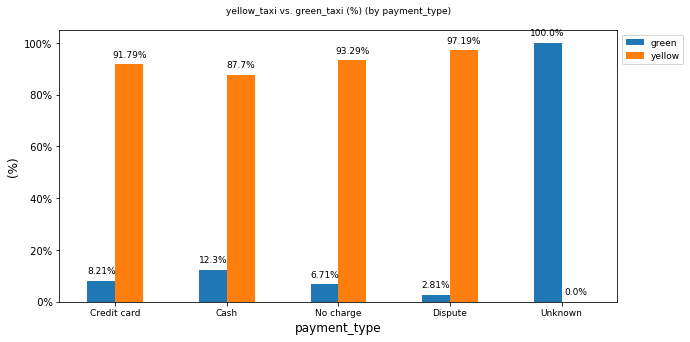

In [16]:
green_yellow_bar_plot(df, 'payment_type')

In [17]:
def trip_duration_stats(df):
    from datetime import timedelta as td
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    # display total travel time
    total_travel_duration = (pd.to_datetime(df['tpep_dropoff_datetime']) - pd.to_datetime(df['tpep_pickup_datetime'])).sum()
    days =  total_travel_duration.days
    hours = total_travel_duration.seconds // (60*60)
    minutes = total_travel_duration.seconds % (60*60) // 60
    seconds = total_travel_duration.seconds % (60*60) % 60
    print(f'Total travel time is: {days} days {hours} hours {minutes} minutes {seconds} seconds')

    # display mean travel time
    average_travel_duration = (pd.to_datetime(df['tpep_dropoff_datetime']) - pd.to_datetime(df['tpep_pickup_datetime'])).mean()
    days =  average_travel_duration.days
    hours = average_travel_duration.seconds // (60*60)
    minutes = average_travel_duration.seconds % (60*60) // 60
    seconds = average_travel_duration.seconds % (60*60) % 60
    print(f'Average travel time is: {days} days {hours} hours {minutes} minutes {seconds} seconds')

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


In [18]:
trip_duration_stats(df)


Calculating Trip Duration...

Total travel time is: 2756 days 4 hours 57 minutes 45 seconds
Average travel time is: 0 days 0 hours 12 minutes 22 seconds

This took 2.346133232116699 seconds.
----------------------------------------


In [19]:
def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    # display most commonly used start station
    popular_start_station = df['tpep_pickup_datetime'].mode()[0]
    print(f'The most popular tpep_pickup_datetime is: {popular_start_station}')

    # display most commonly used end station
    popular_end_station = df['tpep_dropoff_datetime'].mode()[0]
    print(f'The most popular tpep_dropoff_datetime is: {popular_end_station}')

    # display most frequent combination of start station and end station trip
    popular_trip = df['tpep_pickup_datetime'] + ' to ' + df['tpep_dropoff_datetime']
    print(f'The most popular trip is: from {popular_trip.mode()[0]}')

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


In [20]:
station_stats(df)


Calculating The Most Popular Stations and Trip...

The most popular tpep_pickup_datetime is: 2020-05-08 13:59:27
The most popular tpep_dropoff_datetime is: 2020-05-30 00:00:00
The most popular trip is: from 2020-05-01 00:21:25 to 2020-05-01 00:24:48

This took 0.6730389595031738 seconds.
----------------------------------------


In [21]:

#Save the combined dataset
df.to_csv('combined_dataset_1.csv', index=False)